In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Mounted at /content/drive
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 48

In [3]:
import dezero.datasets as dsets

x, t = dsets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


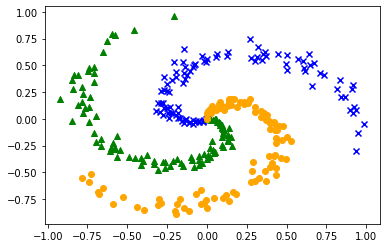

In [7]:
import matplotlib.pyplot as plt


## spiral dataset
for xx, tt in zip(x, t):
    if tt == 0:
        plt.scatter(xx[0], xx[1], c='orange', marker='o')
    elif tt == 1:
        plt.scatter(xx[0], xx[1], c='blue', marker='x')
    else:
        plt.scatter(xx[0], xx[1], c='green', marker='^')

plt.show()

multiclassification

In [35]:
import math
import numpy as np
import dezero
from dezero import optimizers
from dezero import Variable as v
import dezero.functions as F
from dezero.models import MLP
import dezero.datasets as dsets


# hyper parameter
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

# set data
x, t = dsets.get_spiral(train=True)
model = MLP((hidden_size, 3))   # 0, 1, 2의 class
optimizer = optimizers.SGD(lr)
optimizer.setup(model)
data_size = len(x)
max_iter = math.ceil(data_size / batch_size)    # 소수점 반올림

# train
AVG_LOSS = []   # for plot

for epoch in range(max_epoch):
    # dataset index shuffle
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # mini batch
        batch_index = index[i * batch_size:(i+1) * batch_size]
        batch_x = v(x[batch_index])
        batch_t = v(t[batch_index])

        # calculate grad & update params
        y = model(batch_x)
        loss  = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(batch_t)

    # print training result for 30 epoch
    avg_loss = sum_loss / data_size
    AVG_LOSS.append(avg_loss)
    if (epoch+1) % 30 == 0:
        print(f'epoch {epoch+1}, loss {avg_loss:.2f}')

epoch 30, loss 0.73
epoch 60, loss 0.64
epoch 90, loss 0.47
epoch 120, loss 0.35
epoch 150, loss 0.25
epoch 180, loss 0.20
epoch 210, loss 0.17
epoch 240, loss 0.16
epoch 270, loss 0.14
epoch 300, loss 0.13


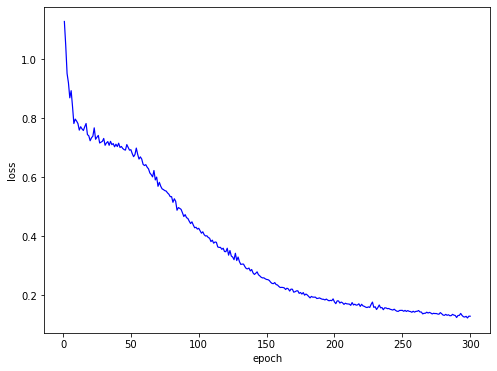

In [27]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 301), AVG_LOSS, c='blue', linewidth=1.2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

decision boundary

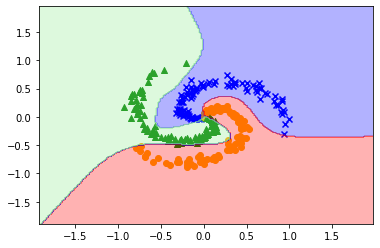

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = F.softmax(Z)    # 입력 데이터 별 class 확률 계산
    ZZ = []
    for z in Z:
        zz = [elem.data for elem in z]  # np.argmax계산을 위해서는 variable 인스턴스 속 data값이 필요
        ZZ.append(np.argmax(zz))
    ZZ = np.array(ZZ)   # .shape는 np.array의 함수
    ZZ = ZZ.reshape(xx1.shape)
    plt.contourf(xx1, xx2, ZZ, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

## spiral dataset
for xx, tt in zip(x, t):
    if tt == 0:
        plt.scatter(xx[0], xx[1], c='orange', marker='o')
    elif tt == 1:
        plt.scatter(xx[0], xx[1], c='blue', marker='x')
    else:
        plt.scatter(xx[0], xx[1], c='green', marker='^')

plot_decision_regions(x, t, classifier=model)